# Initialization

In [216]:
%pip install ortools

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Python310\python.exe -m pip install --upgrade pip' command.


In [217]:
from ortools.sat.python import cp_model
import time
from ortools.constraint_solver import pywrapcp

In [218]:
grid = [['/','\\','/'],['/','/','\\'],['/','\\','\\']]

In [219]:
# intersect = [["*", "0", "*", "*", "*", "0"],
#              ["*", "3", "*" ,"3" ,"*" ,"*"],
#              ["1", "*", "*" ,"*", "3" ,"*"],
#              ["*", "3" ,"*", "*", "2", "2"],
#              ["*", "*", "4", "*", "*", "*"],
#              ["*", "*", "*", "*", "1", "*"]]

In [ ]:
given1 = [["*", "2", "*", "2", "0"],
          ["2", "*", "*", "*", "2"],
          ["*", "*", "*", "*", "*"],
          ["*", "*", "*", "*", "2"],
          ["*", "2", "*", "2", "*"]]

given2 = [  ["*", "*", "*", "*", "1", "*", "*", "*", "*", "1", "*"],
            ["*", "1", "2", "1", "*", "*", "*", "3", "*", "*", "1"],
            ["1", "3", "1", "*", "2", "*", "*", "2", "*", "1", "*"],
            ["*", "*", "1", "*", "*", "1", "*", "2", "3", "*", "*"],
            ["*", "*", "*", "1", "*", "1", "1", "*", "1", "2", "*"],
            ["*", "2", "*", "2", "2", "*", "2", "*", "2", "*", "*"],
            ["*", "3", "3", "*", "*", "*", "*", "*", "*", "2", "*"],
            ["1", "1", "2", "2", "2", "3", "1", "2", "2", "*", "*"],
            ["*", "1", "*", "*", "*", "1", "2", "*", "*", "3", "*"],
            ["*", "*", "2", "1", "*", "2", "2", "*", "1", "*", "*"],
            ["1", "*", "*", "*", "1", "*", "*", "*", "*", "1", "*"]]

# Benchmarks

In [220]:
Easy = {
    "e1": [["*", "*", "1"],
           ["*", "3", "*"],
           ["1", "*", "1"]],
    "e2": [["1", "*", "0"],
           ["*", "2", "*"],
           ["*", "*", "*"]],
    "e3": [["*", "1", "*"],
           ["*", "*", "*"],
           ["*", "*", "*"]],
    "e4": [["*", "*", "*"],
           ["*", "3", "*"],
           ["*", "*", "*"]],
    "e5": [["0", "2", "*"],
           ["1", "*", "1"],
           ["*", "*", "1"]]
}

Normal = {
    "n1": [["*", "*", "2", "*", "1"],
           ["2", "*", "*", "*", "*"],
           ["*", "*", "*", "*", "*"],
           ["*", "*", "*", "*", "1"],
           ["*", "1", "*", "1", "*"]],
    "n2": [["*", "*", "*", "*", "*"],
           ["*", "2", "*", "*", "*"],
           ["*", "*", "*", "*", "1"],
           ["*", "3", "*", "*", "*"],
           ["*", "*", "1", "*", "*"]],
    "n3": [["*", "*", "*", "*", "*"],
           ["2", "*", "2", "*", "1"],
           ["*", "*", "*", "*", "*"],
           ["*", "*", "*", "1", "*"],
           ["*", "*", "*", "*", "*"]],
    "n4": [["*", "2", "*", "*", "*"],
           ["2", "*", "*", "*", "1"],
           ["*", "*", "*", "*", "*"],
           ["*", "*", "4", "*", "*"],
           ["*", "1", "*", "*", "*"]],
    "n5": [["*", "2", "*", "*", "*"],
           ["2", "*", "2", "*", "1"],
           ["*", "*", "*", "*", "*"],
           ["*", "*", "*", "1", "*"],
           ["*", "*", "*", "*", "*"]]
}

Hard = {
    "h1": [["1", "*", "2", "*", "*", "1", "*"],
           ["*", "*", "*", "*", "*", "*", "2"],
           ["*", "3", "*", "*", "3", "*", "*"],
           ["*", "*", "*", "*", "*", "2", "*"],
           ["*", "*", "*", "3", "*", "*", "*"],
           ["1", "*", "*", "*", "*", "2", "*"],
           ["*", "2", "*", "1", "*", "*", "*"]],

    "h2": [["*", "*", "2", "*", "1", "*", "*"],
           ["*", "*", "*", "*", "1", "*", "*"],
           ["*", "2", "*", "*", "*", "*", "*"],
           ["2", "*", "*", "3", "1", "*", "*"],
           ["*", "*", "*", "*", "*", "*", "*"],
           ["2", "*", "*", "*", "1", "*", "*"],
           ["*", "*", "*", "*", "*", "*", "*"]],
           
    "h3": [["*", "*", "2", "*", "1", "*", "1"],
           ["*", "*", "*", "3", "1", "*", "*"],
           ["*", "2", "*", "*", "*", "*", "*"],
           ["2", "*", "*", "*", "1", "*", "2"],
           ["*", "*", "*", "*", "*", "*", "*"],
           ["*", "*", "*", "3", "1", "*", "2"],
           ["0", "*", "*", "*", "*", "*", "*"]],

    "h4": [["*", "*", "2", "*", "1", "*", "*"],
           ["*", "*", "*", "3", "1", "*", "*"],
           ["*", "2", "*", "*", "*", "*", "*"],
           ["2", "*", "*", "3", "1", "*", "*"],
           ["*", "*", "*", "*", "*", "*", "*"],
           ["2", "*", "*", "3", "1", "*", "*"],
           ["*", "2", "*", "*", "*", "*", "*"]],

    "h5": [["*", "*", "2", "*", "1", "*", "*"],
           ["1", "*", "*", "3", "*", "*", "*"],
           ["0", "2", "*", "*", "*", "*", "*"],
           ["*", "*", "*", "*", "*", "*", "*"],
           ["*", "2", "*", "*", "*", "*", "*"],
           ["2", "*", "*", "3", "*", "*", "*"],
           ["*", "2", "*", "*", "*", "*", "*"]],
}


In [295]:
intersect = Easy["e3"]

|     |     |     |
|:---:|:---:|:---:|
|  /  |  \  |  /  |
|  /  |  /  |  \  |
|  /  |  \  |  \  |

In [222]:
listOfIntersects = list()
for k,v in Easy.items():
    listOfIntersects.append(v)
for k,v in Normal.items():
    listOfIntersects.append(v)
for k,v in Hard.items():
    listOfIntersects.append(v)
listOfIntersects

[[['*', '*', '1'], ['*', '3', '*'], ['1', '*', '1']],
 [['1', '*', '0'], ['*', '2', '*'], ['*', '*', '*']],
 [['*', '1', '*'], ['*', '*', '*'], ['*', '*', '*']],
 [['*', '*', '*'], ['*', '3', '*'], ['*', '*', '*']],
 [['0', '2', '*'], ['1', '*', '1'], ['*', '*', '1']],
 [['*', '*', '2', '*', '1'],
  ['2', '*', '*', '*', '*'],
  ['*', '*', '*', '*', '*'],
  ['*', '*', '*', '*', '1'],
  ['*', '1', '*', '1', '*']],
 [['*', '*', '*', '*', '*'],
  ['*', '2', '*', '*', '*'],
  ['*', '*', '*', '*', '1'],
  ['*', '3', '*', '*', '*'],
  ['*', '*', '1', '*', '*']],
 [['*', '*', '*', '*', '*'],
  ['2', '*', '2', '*', '1'],
  ['*', '*', '*', '*', '*'],
  ['*', '*', '*', '1', '*'],
  ['*', '*', '*', '*', '*']],
 [['*', '2', '*', '*', '*'],
  ['2', '*', '*', '*', '1'],
  ['*', '*', '*', '*', '*'],
  ['*', '*', '4', '*', '*'],
  ['*', '1', '*', '*', '*']],
 [['*', '2', '*', '*', '*'],
  ['2', '*', '2', '*', '1'],
  ['*', '*', '*', '*', '*'],
  ['*', '*', '*', '1', '*'],
  ['*', '*', '*', '*', '*']],


# Grid

In [223]:
class GridCell:
    def __init__(self, r, c, info = '-'):
        self.left = 0 # '/'
        self.right = 0 # '\'
        self.r = r
        self.c = c
        self.info = info
        

In [224]:
class Grid:
    def __init__(self,inter):
        self.inter = inter
        self.grid = list()

        for r in range(len(self.inter)-1):
            temp = list()
            for c in range(len(self.inter[0])-1):
                gridCell = GridCell(r,c)
                temp.append(gridCell)
            self.grid.append(temp)

    def __str__(self):
        empstr = ""

        for i in range(len(self.grid)):
            for j in range(len(self.grid[0])):

                if(self.grid[i][j].right == 0 and self.grid[i][j].left == 0):
                    empstr += " - "
                else:
                    empstr += self.grid[i][j].info + '  '
            empstr += '\n\n'

        return empstr

    def GetRowColCount(self):
        return (len(self.grid), len(self.grid[0]))

    def Clear(self):
        self.grid = list()

        for r in range(len(self.inter)-1):
            temp = list()
            for c in range(len(self.inter[0])-1):
                gridCell = GridCell(r,c)
                temp.append(gridCell)
            self.grid.append(temp)
        

In [225]:
def Griddify(solver, matrix, i):

    grid = Grid(i)
    
    for r in range(len(matrix)):
        for c in range(len(matrix[0])):
            # print(f"left_vars[{r}][{c}] -> {solver.Value(left_vars[r][c])}  right_vars[{r}][{c}] -> {solver.Value(right_vars[r][c])} ")
            if(solver.Value(matrix[r][c]) == 1):
                grid.grid[r][c].left = 1
                grid.grid[r][c].info = '/'
            else:
                grid.grid[r][c].right = 1
                grid.grid[r][c].info = '\\'

    return grid

### Loop Checker

In [226]:
class Graph:
    def __init__(self, GRID):
        self.graph = dict()

        for i in range(len(GRID)):
            for j in range(len(GRID[0])):
                if(GRID[i][j].info == '\\'):
                    c1 = (i, j)
                    c2 = (i+1, j+1)
                elif(GRID[i][j].info == '/'):
                    c1 = (i+1, j)
                    c2 = (i, j+1)
                else:
                    continue
                if(c1 not in self.graph):
                    self.graph[c1] = list()
                if(c2 not in self.graph):  
                    self.graph[c2] = list()
                self.graph[c1].append(c2)
                self.graph[c2].append(c1)

    def __str__(self):
        emp_str = ""
        for k,v in self.graph.items():
            emp_str += str(k) + " -> " + str(v) + '\n'
        return emp_str
    
    def DFS(self, graph,visitedSet, v, parent):
        visitedSet.add(v)
        for n in graph[v]:  #n == neighbor
            if n not in visitedSet:
                if self.DFS(graph, visitedSet, n, v):
                    return True
            elif n != parent:
                return True
        return False

    def IsCyclic(self,graph):
        visitedSet = set()

        for v in graph:
            if v not in visitedSet:
                if self.DFS(graph,visitedSet, v, None):
                    return True

        return False

    def LoopCheck(self):
        return self.IsCyclic(self.graph)

As a constraint we can take each grid and for each grids coordinate depend on the / or \ symbol is used, we can give the start index on Loop check function using google or tools

In [227]:
gr = Grid(intersect)

In [228]:
print(gr)

 -  -  -  - 

 -  -  -  - 

 -  -  -  - 

 -  -  -  - 




# Iterative Solver

In [229]:
import numpy as np

In [290]:
def define_model(i):
    solver = pywrapcp.Solver('CPSimple')
    grid = Grid(i)

    Row, Column = grid.GetRowColCount() #Row column length

    left_vars = [[solver.IntVar(0,1, f'left_{r}_{c}') for c in range(Column)] for r in range(Row)]
    right_vars = [[solver.IntVar(0,1, f'right_{r}_{c}') for c in range(Column)] for r in range(Row)]
    # print("Number of variables: {}".format(2*Row*Column))

    #Add constraint
    for r in range(Row):
        for c in range(Column):
            solver.Add(left_vars[r][c] + right_vars[r][c] == 1)

    #1st Constraint
    for r in range(len(i)):
        for c in range(len(i[0])):
            if(i[r][c] != '*'):
                num = ord(i[r][c]) - ord('0')
                # print(num)
                # Edge Cases
                if(r == 0 and c == 0): #E1
                    solver.Add(right_vars[r][c] == num)
                elif(r == 0 and c == len(i[0])-1): #E2
                    solver.Add(left_vars[r][c-1] == num)
                elif(r == len(i) - 1 and c == 0): #E3
                    solver.Add(left_vars[r-1][c] == num)
                elif(r == len(i) - 1  and  c == len(i[0])-1): #E4
                    solver.Add(right_vars[r-1][c-1] == num)
                else:
                    if(r == 0):
                        solver.Add((left_vars[r][c-1] + right_vars[r][c]) == num)
                    elif(c == 0):
                        solver.Add((left_vars[r-1][c] + right_vars[r][c]) == num)
                    elif(c == len(i[0]) - 1):
                        solver.Add((right_vars[r-1][c-1] + left_vars[r][c-1]) == num)
                    elif(r == len(i) - 1):
                        solver.Add(( right_vars[r-1][c-1] + left_vars[r-1][c] ) == num)
                    else:
                        solver.Add((right_vars[r-1][c-1] + left_vars[r-1][c] + left_vars[r][c-1] + right_vars[r][c]) == num)
    
    # print('Number of constraints: ', solver.Constraints())

    li = [left_vars[r][c] for r in range(Row) for c in range(Column)]

    decision_builder = solver.Phase(li , solver.CHOOSE_FIRST_UNBOUND,
                                    solver.ASSIGN_MIN_VALUE)

    return (solver, decision_builder, li, Row, Column)

In [276]:
solver, decision_builder, value_list, row, col = define_model(intersect)

Number of variables: 72
Number of constraints:  48


In [293]:
def solve_iterative(i,solver, decision_builder, value_list, ROW , COL):
    
    count = 0
    backtrack_count = 0
    solver.NewSearch(decision_builder)
    while solver.NextSolution():
        backtrack_count += 1
        solution = 'Solution {}:\n'.format(count)
        sol = list()
        for var in value_list:
            solution += ' {} = {}'.format(var.Name(), var.Value())
            sol.append(var.Value())
        
        matrix = np.array(sol)
        matrix = matrix.reshape(ROW, COL)    
        
        grid = Grid(i)
    
        for r in range(len(matrix)):
            for c in range(len(matrix[0])):
                # print(f"left_vars[{r}][{c}] -> {solver.Value(left_vars[r][c])}  right_vars[{r}][{c}] -> {solver.Value(right_vars[r][c])} ")
                if((matrix[r][c]) == 1):
                    grid.grid[r][c].left = 1
                    grid.grid[r][c].info = '/'
                else:
                    grid.grid[r][c].right = 1
                    grid.grid[r][c].info = '\\'
        
        graph = Graph(grid.grid)
        if(not graph.LoopCheck()):
            count += 1
            time = solver.WallTime()
            memory = pywrapcp.Solver.MemoryUsage()
            backtrack_count -= 1
            print('Backtrack count {}'.format(backtrack_count))
            return (grid, matrix, solution, time, memory)
    
    if(count == 0):
        print("There is no solution")
        return ([[]], [[]], "There is no solution", -1, -1)  #If there is no solution exist with given constraints

    solver.EndSearch()
    # print('Number of solutions found: ', count)
    print('Backtrack count {}'.format(backtrack_count))
    # print('Advanced usage:')
    # print('Problem solved in ', solver.WallTime(), 'ms')
    # print('Memory usage: ', pywrapcp.Solver.MemoryUsage(), 'bytes')

In [277]:
grid, matrix, solution, time, memory = solve_iterative(intersect, solver, decision_builder, value_list , row, col)

Backtrack count 1164


In [278]:
print(grid)

\  /  \  \  \  \  

\  \  \  \  \  /  

/  \  /  /  \  \  

\  \  \  \  \  \  

\  /  /  \  \  \  

\  /  \  \  \  \  




# Backtrack - Variable Count

In [274]:
for inter in listOfIntersects:
    solver, decision_builder, value_list, row, col = define_model(inter)
    grid, matrix, solution, time, memory = solve_iterative(inter, solver, decision_builder, value_list , row, col)

Number of variables: 8
Number of constraints:  8
Backtrack count 0
Number of variables: 8
Number of constraints:  7
Backtrack count 0
Number of variables: 8
Number of constraints:  5
Backtrack count 0
Number of variables: 8
Number of constraints:  5
Backtrack count 0
Number of variables: 8
Number of constraints:  9
Backtrack count 0
Number of variables: 32
Number of constraints:  22
Backtrack count 0
Number of variables: 32
Number of constraints:  20
Backtrack count 0
Number of variables: 32
Number of constraints:  20
Backtrack count 16
Number of variables: 32
Number of constraints:  21
Backtrack count 8
Number of variables: 32
Number of constraints:  21
Backtrack count 16
Number of variables: 72
Number of constraints:  48
Backtrack count 1164
Number of variables: 72
Number of constraints:  49
Backtrack count 6920
Number of variables: 72
Number of constraints:  45
Backtrack count 8768
Number of variables: 72
Number of constraints:  48
Backtrack count 10888
Number of variables: 72
Numbe

# Solutions of Benchmarks

In [294]:
for inter in listOfIntersects:
    solver, decision_builder, value_list, row, col = define_model(inter)
    grid, matrix, solution, time, memory = solve_iterative(inter, solver, decision_builder, value_list , row, col)
    print(grid)

/  /  

/  \  


\  \  

\  \  


\  \  

\  \  


\  \  

/  \  


/  \  

/  \  


/  /  \  /  

\  \  \  \  

\  \  \  \  

\  \  \  \  


\  \  \  \  

\  \  \  \  

\  \  \  \  

/  \  \  \  


/  \  \  \  

\  \  \  \  

\  /  \  \  

\  \  \  /  


/  \  \  \  

\  \  /  \  

\  \  /  \  

/  /  \  \  


/  \  \  \  

\  \  \  \  

\  /  \  \  

\  \  \  /  


\  /  \  \  \  \  

\  \  \  \  \  /  

/  \  /  /  \  \  

\  \  \  \  \  \  

\  /  /  \  \  \  

\  /  \  \  \  \  


\  /  \  \  \  /  

/  /  /  \  /  \  

/  /  /  \  \  \  

\  \  \  \  /  /  

\  \  /  /  \  \  

\  \  /  \  \  /  


\  /  \  \  \  \  

\  \  \  \  /  \  

/  /  /  /  \  \  

\  /  /  \  \  \  

/  \  /  \  \  \  

\  \  \  \  /  \  


\  /  \  \  \  \  

/  /  /  \  /  \  

/  /  /  /  \  \  

\  /  /  \  \  \  

/  /  /  /  \  \  

\  /  /  \  \  \  


\  /  \  /  /  \  

\  \  \  \  \  \  

/  /  \  \  \  \  

\  \  \  \  \  \  

/  /  \  \  \  \  

\  /  /  \  \  \  




# Performance Analysis

In [244]:
import statistics as st

final_time_list = list()
final_memory_list = list()

for i in listOfIntersects:
    solver, decision_builder, value_list, row, col = define_model(i)
    time_list = list()
    memory_list = list()
    for j in range(30):
        grid, matrix, solution, time, memory = solve_iterative(i,solver, decision_builder, value_list, row, col)
        time_list.append((time/1e4))
        memory_list.append((memory/1e9))
    mean_time = st.mean(time_list)
    mean_memory = st.mean(memory_list)
    print("Time: {}(s)  Memory: {}(MB)".format(mean_time, mean_memory))
    final_time_list.append(mean_time)
    final_memory_list.append(mean_memory)

Number of constraints:  8
Time: 0.00014000000000000001(s)  Memory: 0.10727424(MB)
Number of constraints:  7
Time: 0.00012(s)  Memory: 0.108244992(MB)
Number of constraints:  5
Time: 6.666666666666667e-05(s)  Memory: 0.108244992(MB)
Number of constraints:  5
Time: 6e-05(s)  Memory: 0.108244992(MB)
Number of constraints:  9
Time: 5.333333333333333e-05(s)  Memory: 0.108244992(MB)
Number of constraints:  22
Time: 0.00014666666666666666(s)  Memory: 0.108244992(MB)
Number of constraints:  20
Time: 0.00015000000000000001(s)  Memory: 0.108244992(MB)
Number of constraints:  20
Time: 0.0016333333333333334(s)  Memory: 0.10826902186666666(MB)
Number of constraints:  21
Time: 0.0007866666666666666(s)  Memory: 0.10827776(MB)
Number of constraints:  21
Time: 0.0017866666666666667(s)  Memory: 0.10827776(MB)
Number of constraints:  48
Time: 0.20929333333333333(s)  Memory: 0.10827776(MB)
Number of constraints:  49
Time: 1.15613(s)  Memory: 0.108281856(MB)
Number of constraints:  45
Time: 1.4707766666666

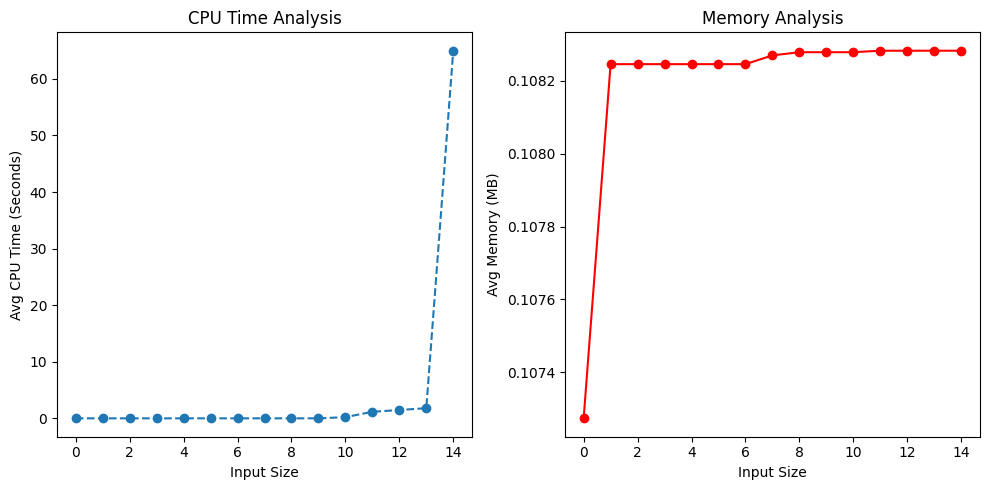

In [288]:
import matplotlib.pyplot as plt

# Define the data
time_list = final_time_list
memory_list = final_memory_list
x = list(range(len(time_list)))

# Create the figure with two subplots
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10,5))

# Plot the time data on the first subplot
ax1.scatter(x,time_list)
ax1.plot(x, time_list, linestyle = '--')
ax1.set_xlabel('Input Size')
ax1.set_ylabel('Avg CPU Time (Seconds)')
ax1.set_title('CPU Time Analysis')

# Plot the memory data on the second subplot
ax2.scatter(x, memory_list, c='r')
ax2.plot(x, memory_list, c='r')
ax2.set_xlabel('Input Size')
ax2.set_ylabel('Avg Memory (MB)')
ax2.set_title('Memory Analysis')

# Adjust the layout to prevent overlapping axis labels
fig.tight_layout()

# Display the plot
plt.show()

### Log Scale

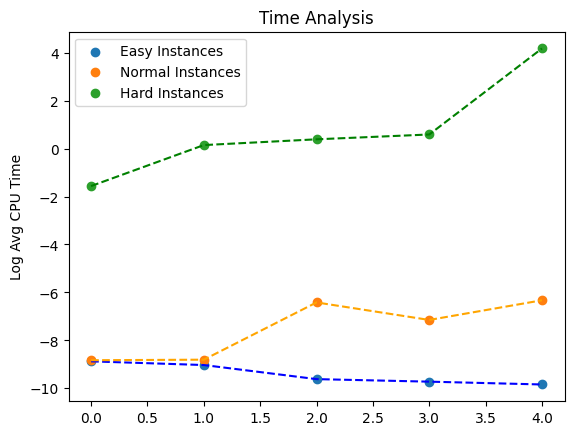

In [285]:
import math

log_time_easy = [math.log(i) for i in time_list[:5]]
log_time_normal = [math.log(i) for i in time_list[5:10]]
log_time_hard = [math.log(i) for i in time_list[10:15]]

plt.scatter(x[:5],log_time_easy, label = 'Easy Instances')
plt.scatter(x[:5],log_time_normal,  label = 'Normal Instances')
plt.scatter(x[:5],log_time_hard, label = 'Hard Instances')

# Draw lines connecting the points
plt.plot(x[:5], log_time_easy, color='blue', linestyle='--')
plt.plot(x[:5], log_time_normal, color='orange', linestyle='--')
plt.plot(x[:5], log_time_hard, color='green', linestyle='--')

# Add labels and legend
plt.xlabel('')
plt.ylabel('Log Avg CPU Time')
plt.title('Time Analysis')
plt.legend()




# Show the plot
plt.show()

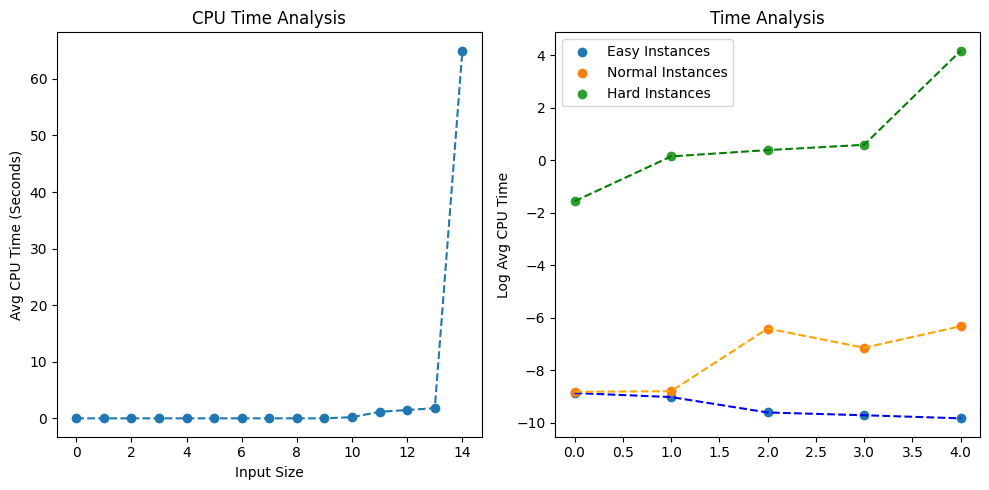

In [289]:
import matplotlib.pyplot as plt

# Define the data
time_list = final_time_list
memory_list = final_memory_list
x = list(range(len(time_list)))

# Create the figure with two subplots
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10,5))

# Plot the time data on the first subplot
ax1.scatter(x,time_list)
ax1.plot(x, time_list, linestyle = '--')
ax1.set_xlabel('Input Size')
ax1.set_ylabel('Avg CPU Time (Seconds)')
ax1.set_title('CPU Time Analysis')

# Plot the memory data on the second subplot
ax2.scatter(x[:5],log_time_easy, label = 'Easy Instances')
ax2.scatter(x[:5],log_time_normal,  label = 'Normal Instances')
ax2.scatter(x[:5],log_time_hard, label = 'Hard Instances')
ax2.plot(x[:5], log_time_easy, color='blue', linestyle='--')
ax2.plot(x[:5], log_time_normal, color='orange', linestyle='--')
ax2.plot(x[:5], log_time_hard, color='green', linestyle='--')
ax2.set_xlabel('')
ax2.set_ylabel('Log Avg CPU Time')
ax2.set_title('Time Analysis')
ax2.legend()

# Adjust the layout to prevent overlapping axis labels
fig.tight_layout()

# Display the plot
plt.show()

# All Solutions

In [296]:
class VarArraySolutionPrinter(cp_model.CpSolverSolutionCallback):
    """Print intermediate solutions."""

    def __init__(self, variables,solver, inter):
        cp_model.CpSolverSolutionCallback.__init__(self)
        self.__variables = variables
        self.__solution_count = 0
        self.__solver = solver
        self.__int = inter
        

    def on_solution_callback(self):
        grid = Griddify(self, self.__variables, self.__int)
        graph = Graph(grid.grid)
        if(not graph.LoopCheck()): #There is no cycle
            print(grid)
            print('\n')
            self.__solution_count += 1
            # print(self.__solution_count)
            # Row = len(self.__variables)
            # Column = len(self.__variables[0])
            # for r in range(Row):
            #     for c in range(Column):
            #         print('%s=%i' % (self.__variables[r][c], self.Value(self.__variables[r][c])), end=' ')
            #         # print(f"left_vars[{r}][{c}] -> {solver.Value(left_vars[r][c])}  right_vars[{r}][{c}] -> {solver.Value(right_vars[r][c])} ")
            #     print()
            print("--------------------------------------------------------------")


    def solution_count(self):
        return self.__solution_count

In [297]:
def develop_model(i):
    model = cp_model.CpModel()
    grid = Grid(i)

    Row, Column = grid.GetRowColCount() #Row column length

    left_vars = [[model.NewIntVar(0,1, f'left_{r}_{c}') for c in range(Column)] for r in range(Row)]
    right_vars = [[model.NewIntVar(0,1, f'right_{r}_{c}') for c in range(Column)] for r in range(Row)]

    #Add constraint
    for r in range(Row):
        for c in range(Column):
            model.Add(left_vars[r][c] + right_vars[r][c] == 1)


    
    #1st Constraint
    for r in range(len(i)):
        for c in range(len(i[0])):
            if(i[r][c] != '*'):
                num = ord(i[r][c]) - ord('0')
                # print(num)
                # Edge Cases
                if(r == 0 and c == 0): #E1
                    model.Add(right_vars[r][c] == num)
                elif(r == 0 and c == len(i[0])-1): #E2
                    model.Add(left_vars[r][c-1] == num)
                elif(r == len(i) - 1 and c == 0): #E3
                    model.Add(left_vars[r-1][c] == num)
                elif(r == len(i) - 1  and  c == len(i[0])-1): #E4
                    model.Add(right_vars[r-1][c-1] == num)
                else:
                    if(r == 0):
                        model.Add((left_vars[r][c-1] + right_vars[r][c]) == num)
                    elif(c == 0):
                        model.Add((left_vars[r-1][c] + right_vars[r][c]) == num)
                    elif(c == len(i[0]) - 1):
                        model.Add((right_vars[r-1][c-1] + left_vars[r][c-1]) == num)
                    elif(r == len(i) - 1):
                        model.Add(( right_vars[r-1][c-1] + left_vars[r-1][c] ) == num)
                    else:
                        model.Add((right_vars[r-1][c-1] + left_vars[r-1][c] + left_vars[r][c-1] + right_vars[r][c]) == num)
    return (left_vars, model)
    

In [298]:
left_vars, model = develop_model(intersect)

In [299]:
def Solve(i, left, model):


    solver = cp_model.CpSolver()

    solution_printer = VarArraySolutionPrinter(left,solver,i)
    # Enumerate all solutions.
    solver.parameters.enumerate_all_solutions = True
    status = solver.Solve(model, solution_printer)

    if(status == cp_model.FEASIBLE or status == cp_model.OPTIMAL):
        print(solver.NumConflicts())

In [300]:
Solve(intersect, left_vars, model)

\  \  

/  /  




--------------------------------------------------------------
\  \  

\  /  




--------------------------------------------------------------
\  \  

\  \  




--------------------------------------------------------------
\  \  

/  \  




--------------------------------------------------------------
/  /  

/  \  




--------------------------------------------------------------
/  /  

/  /  




--------------------------------------------------------------
/  /  

\  /  




--------------------------------------------------------------
/  /  

\  \  




--------------------------------------------------------------
0
